# Assignment - KMeans with make_blobs

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

### Generate and visualize Data

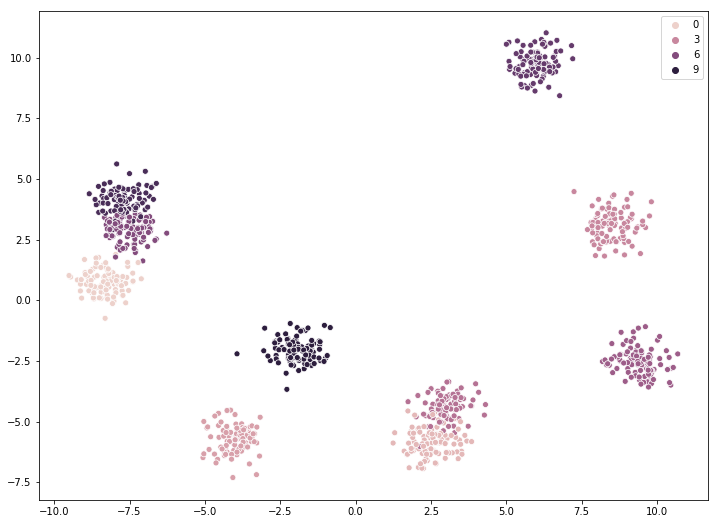

In [61]:
X, y = make_blobs(n_samples=1000,
    n_features=2,
    centers=10,
    cluster_std=.5,
    shuffle=True,
    random_state=None,)


# dimension reduction -- required for plotting if more than 2 features
pca = PCA(n_components=2)
X_decomposed = pca.fit_transform(X)
plt.figure(figsize=(12,9))
sns.scatterplot(X_decomposed[:,0], X_decomposed[:,1], hue=y)

### Applying Kmeans with K as 7

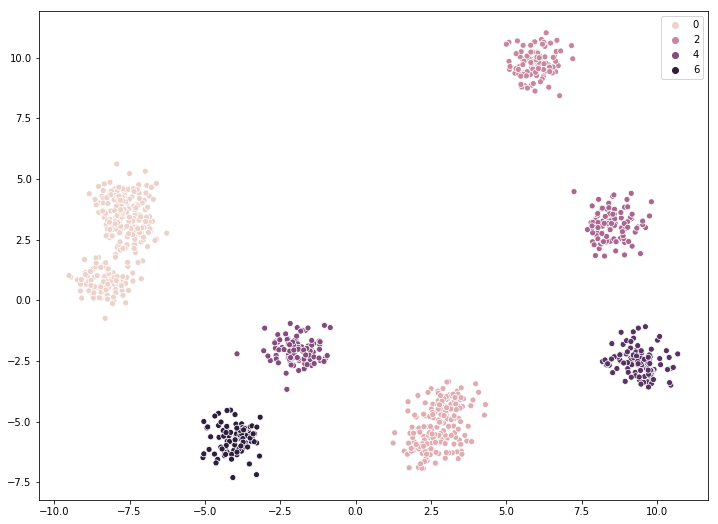

In [63]:
kmeans = KMeans(n_clusters=7,
    init='k-means++',
    n_init=30,
    max_iter=500,
    tol=0.0001,
    precompute_distances=True,
    algorithm='auto')

y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(12,9))
sns.scatterplot(X_decomposed[:,0], X_decomposed[:,1], hue=y_pred)

### Using GridSearchCV to optimise the results

In [66]:
kmeans_cv = KMeans(
    init='k-means++',
    n_init=30,
    max_iter=500,
    tol=0.0001,
    precompute_distances=True,
    algorithm='auto'
)

parameters = {
    'n_clusters': range(11)[4:]
}
gscv = GridSearchCV(kmeans_cv, parameters, cv=5)
gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=8, n_init=30, n_jobs=None, precompute_distances=True,
    random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_clusters': range(4, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [69]:
gscv.best_params_

{'n_clusters': 10}

### KMeans with best parameters

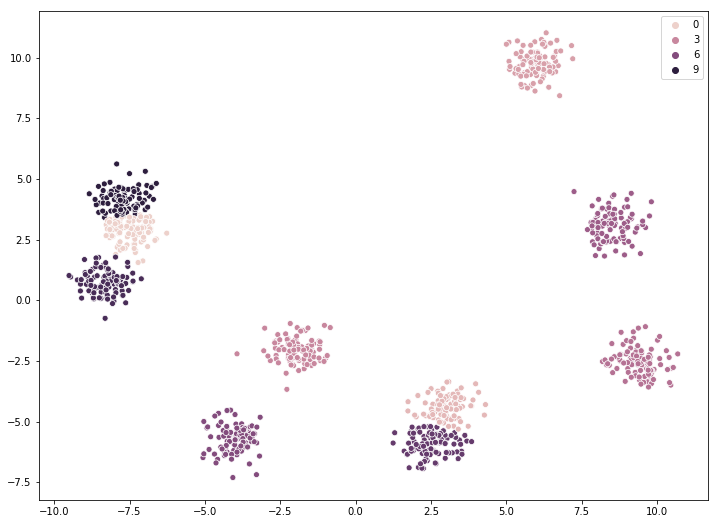

In [72]:
kmeans_best = KMeans(
    n_clusters=10,
    init='k-means++',
    n_init=30,
    max_iter=500,
    tol=0.0001,
    precompute_distances=True,
    algorithm='auto'
)

y_pred = kmeans_best.fit_predict(X)

plt.figure(figsize=(12,9))
sns.scatterplot(X_decomposed[:,0], X_decomposed[:,1], hue=y_pred)